In [1]:
# from matplotlib import font_manager
#
# for font in font_manager.fontManager.ttflist:
#     print(font.name, font.fname)
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import font_manager, rc

In [2]:
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
graph = pd.read_csv('C:/Users/user/Desktop/교육/프로젝트/최종/데이터/판교푸르지오그랑블실거래가_110713-210713.csv')
graph['계약날짜'] = graph['계약년월']

for i in range(len(graph['거래금액(만원)'])):
    graph['계약날짜'][i] = str(graph['계약년월'][i]) + str(graph['계약일'][i]).zfill(2)
    graph['계약날짜'][i] = datetime.strptime(str(graph['계약날짜'][i]), "%Y%m%d").date()
    graph['거래금액(만원)'][i] = int(graph['거래금액(만원)'][i][:-4] + graph['거래금액(만원)'][i][-3:])
    
print(graph.describe())
# 면적 분류 : 98.986, 105.130, 117.519

<ipython-input-3-698fa8a6b21b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['계약날짜'][i] = str(graph['계약년월'][i]) + str(graph['계약일'][i]).zfill(2)
<ipython-input-3-698fa8a6b21b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['계약날짜'][i] = datetime.strptime(str(graph['계약날짜'][i]), "%Y%m%d").date()
<ipython-input-3-698fa8a6b21b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['거래금액(만원)'][i] = int(graph['거래금액(만원)'][i][:

          번지     본번     부번     전용면적(㎡)           계약년월         계약일           층  \
count  443.0  443.0  443.0  443.000000     443.000000  443.000000  443.000000   
mean   542.0  542.0    0.0  110.936666  201619.726862   15.693002   11.717833   
std      0.0    0.0    0.0   16.571146     215.618462    8.657412    6.368710   
min    542.0  542.0    0.0   97.713600  201111.000000    1.000000    1.000000   
25%    542.0  542.0    0.0   98.986000  201409.500000    8.000000    6.000000   
50%    542.0  542.0    0.0  105.130800  201610.000000   16.000000   12.000000   
75%    542.0  542.0    0.0  117.519300  201712.000000   23.000000   17.000000   
max    542.0  542.0    0.0  265.554300  202106.000000   31.000000   25.000000   

         건축년도  해제사유발생일  
count   443.0      0.0  
mean   2011.0      NaN  
std       0.0      NaN  
min    2011.0      NaN  
25%    2011.0      NaN  
50%    2011.0      NaN  
75%    2011.0      NaN  
max    2011.0      NaN  


# 스타벅스 판교알파돔시티점

In [4]:
graph_s = graph[(graph['전용면적(㎡)']<=98.986) & (pd.to_datetime('2016-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2016-01-01'))]
graph_m = graph[(graph['전용면적(㎡)']>98.986) & (graph['전용면적(㎡)']<=105.130) & (pd.to_datetime('2016-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2016-01-01'))]
graph_l = graph[(graph['전용면적(㎡)']>105.130) & (graph['전용면적(㎡)']<=117.519) & (pd.to_datetime('2016-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2016-01-01'))]
graph_xl = graph[(graph['전용면적(㎡)']>117.519) & (pd.to_datetime('2016-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2016-01-01'))]

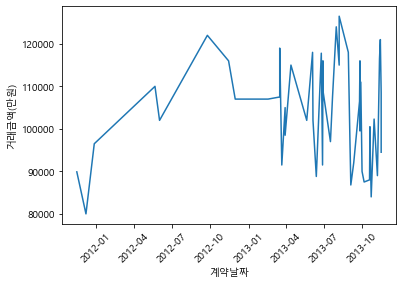

In [5]:
plt.plot(graph['계약날짜'][:50], graph['거래금액(만원)'][:50])
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()
graph_all = graph[(pd.to_datetime('2016-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2016-01-01'))]

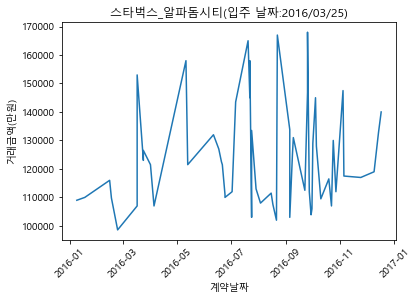

In [6]:
plt.plot(graph_all['계약날짜'], graph_all['거래금액(만원)'])
plt.title('스타벅스_알파돔시티(입주 날짜:2016/03/25)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

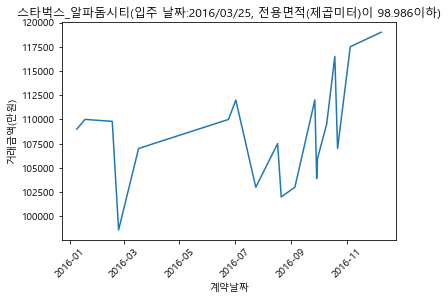

In [7]:
plt.plot(graph_s['계약날짜'], graph_s['거래금액(만원)'])
plt.title('스타벅스_알파돔시티(입주 날짜:2016/03/25, 전용면적(제곱미터)이 98.986이하)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

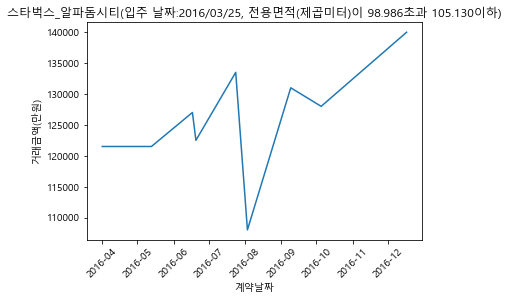

In [8]:
plt.plot(graph_m['계약날짜'], graph_m['거래금액(만원)'])
plt.title('스타벅스_알파돔시티(입주 날짜:2016/03/25, 전용면적(제곱미터)이 98.986초과 105.130이하)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

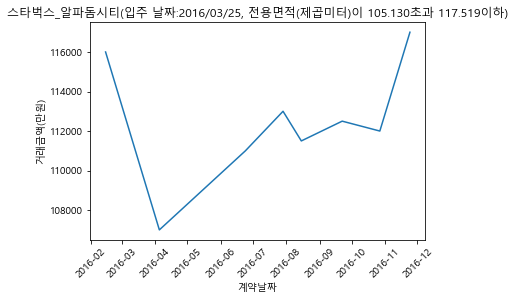

In [9]:
plt.plot(graph_l['계약날짜'], graph_l['거래금액(만원)'])
plt.title('스타벅스_알파돔시티(입주 날짜:2016/03/25, 전용면적(제곱미터)이 105.130초과 117.519이하)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

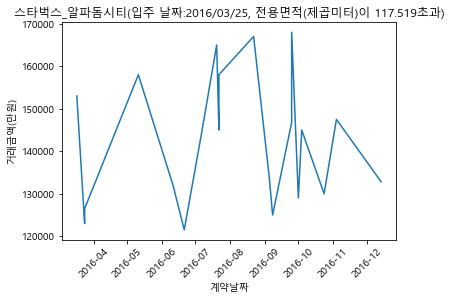

In [10]:
plt.plot(graph_xl['계약날짜'], graph_xl['거래금액(만원)'])
plt.title('스타벅스_알파돔시티(입주 날짜:2016/03/25, 전용면적(제곱미터)이 117.519초과)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

# 스타벅스 판교아비뉴프랑R점

In [11]:
graph_s = graph[(graph['전용면적(㎡)']<=98.986) & (pd.to_datetime('2018-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2018-01-01'))]
graph_m = graph[(graph['전용면적(㎡)']>98.986) & (graph['전용면적(㎡)']<=105.130) & (pd.to_datetime('2018-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2018-01-01'))]
graph_l = graph[(graph['전용면적(㎡)']>105.130) & (graph['전용면적(㎡)']<=117.519) & (pd.to_datetime('2018-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2018-01-01'))]
graph_xl = graph[(graph['전용면적(㎡)']>117.519) & (pd.to_datetime('2018-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2018-01-01'))]

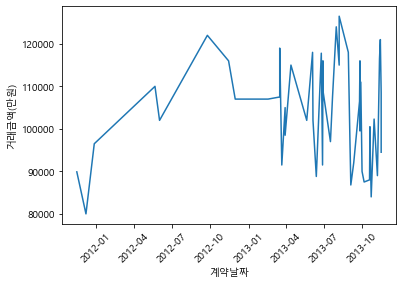

In [12]:
plt.plot(graph['계약날짜'][:50], graph['거래금액(만원)'][:50])
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()
graph_all = graph[(pd.to_datetime('2018-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2018-01-01'))]

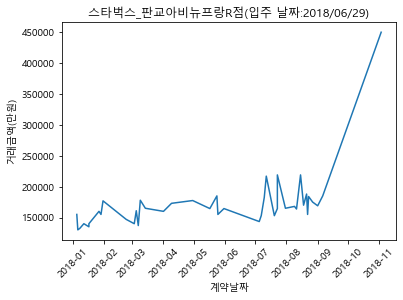

In [13]:
plt.plot(graph_all['계약날짜'], graph_all['거래금액(만원)'])
plt.title('스타벅스_판교아비뉴프랑R점(입주 날짜:2018/06/29)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

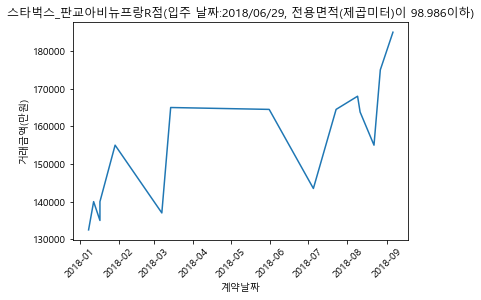

In [14]:
plt.plot(graph_s['계약날짜'], graph_s['거래금액(만원)'])
plt.title('스타벅스_판교아비뉴프랑R점(입주 날짜:2018/06/29, 전용면적(제곱미터)이 98.986이하)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

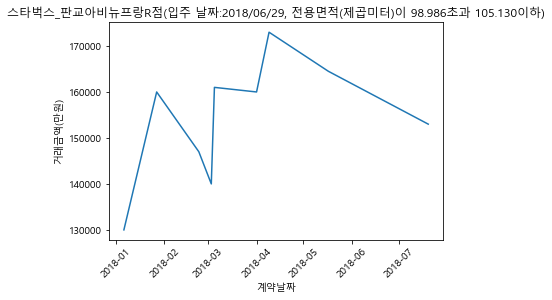

In [15]:
plt.plot(graph_m['계약날짜'], graph_m['거래금액(만원)'])
plt.title('스타벅스_판교아비뉴프랑R점(입주 날짜:2018/06/29, 전용면적(제곱미터)이 98.986초과 105.130이하)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

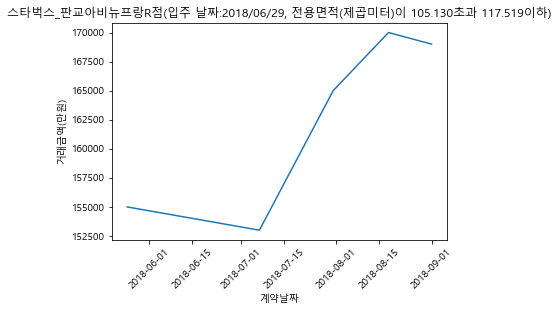

In [16]:
plt.plot(graph_l['계약날짜'], graph_l['거래금액(만원)'])
plt.title('스타벅스_판교아비뉴프랑R점(입주 날짜:2018/06/29, 전용면적(제곱미터)이 105.130초과 117.519이하)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

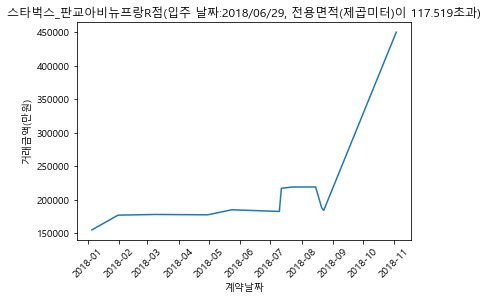

In [17]:
plt.plot(graph_xl['계약날짜'], graph_xl['거래금액(만원)'])
plt.title('스타벅스_판교아비뉴프랑R점(입주 날짜:2018/06/29, 전용면적(제곱미터)이 117.519초과)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

# 스타벅스 판교알파돔타워점

In [18]:
graph_s = graph[(graph['전용면적(㎡)']<=98.986) & (pd.to_datetime('2019-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2019-01-01'))]
graph_m = graph[(graph['전용면적(㎡)']>98.986) & (graph['전용면적(㎡)']<=105.130) & (pd.to_datetime('2019-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2019-01-01'))]
graph_l = graph[(graph['전용면적(㎡)']>105.130) & (graph['전용면적(㎡)']<=117.519) & (pd.to_datetime('2019-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2019-01-01'))]
graph_xl = graph[(graph['전용면적(㎡)']>117.519) & (pd.to_datetime('2019-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2019-01-01'))]

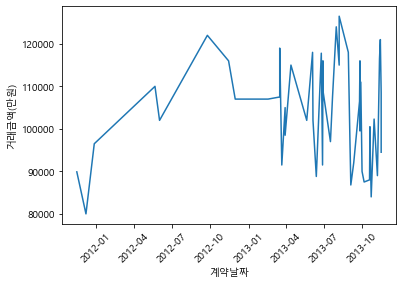

In [19]:
plt.plot(graph['계약날짜'][:50], graph['거래금액(만원)'][:50])
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()
graph_all = graph[(pd.to_datetime('2019-12-31') >= graph['계약날짜']) & (graph['계약날짜'] >= pd.to_datetime('2019-01-01'))]

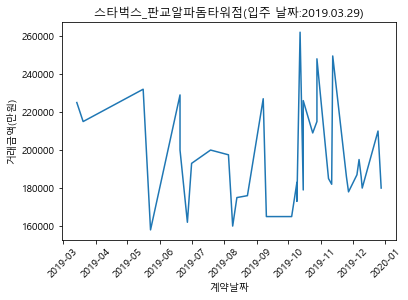

In [20]:
plt.plot(graph_all['계약날짜'], graph_all['거래금액(만원)'])
plt.title('스타벅스_판교알파돔타워점(입주 날짜:2019.03.29)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

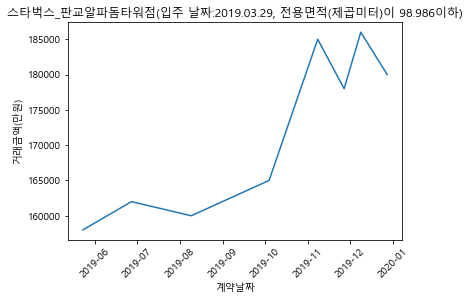

In [21]:
plt.plot(graph_s['계약날짜'], graph_s['거래금액(만원)'])
plt.title('스타벅스_판교알파돔타워점(입주 날짜:2019.03.29, 전용면적(제곱미터)이 98.986이하)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

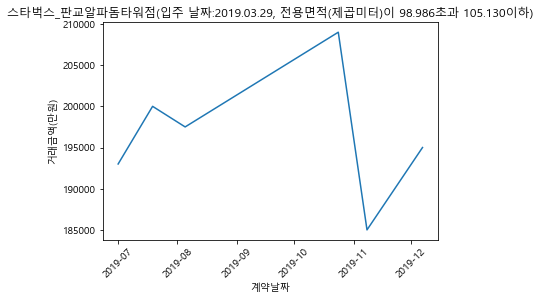

In [22]:
plt.plot(graph_m['계약날짜'], graph_m['거래금액(만원)'])
plt.title('스타벅스_판교알파돔타워점(입주 날짜:2019.03.29, 전용면적(제곱미터)이 98.986초과 105.130이하)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

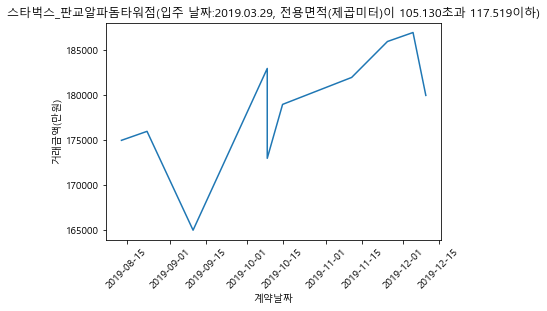

In [23]:
plt.plot(graph_l['계약날짜'], graph_l['거래금액(만원)'])
plt.title('스타벅스_판교알파돔타워점(입주 날짜:2019.03.29, 전용면적(제곱미터)이 105.130초과 117.519이하)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

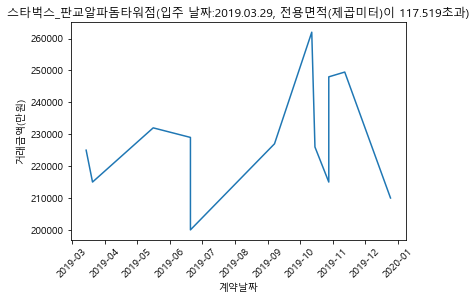

In [24]:
plt.plot(graph_xl['계약날짜'], graph_xl['거래금액(만원)'])
plt.title('스타벅스_판교알파돔타워점(입주 날짜:2019.03.29, 전용면적(제곱미터)이 117.519초과)')
plt.xlabel('계약날짜')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()